# **TP BDDA - Belli Bilal - SIQ1**

## **1. Les outils utilisées**

### **1.1. L'environnement 'Google colab'**

Google Colab est un environnement de développement basé sur le cloud qui permet d'écrire, de compiler et d'exécuter du code Python directement dans un navigateur Web. Il offre un accès gratuit à des ressources informatiques telles que des processeurs et des cartes graphiques pour les calculs intensifs, ainsi qu'une intégration transparente avec des services tels que Google Drive et des bibliothèques populaires comme Pandas et NumPy. Google Colab est souvent utilisé pour l'apprentissage machine et l'analyse de données en raison de sa flexibilité, de sa facilité d'utilisation et de sa capacité à gérer de grandes quantités de données.

Le lien vers l'environnement: [colab google](https://colab.research.google.com/)

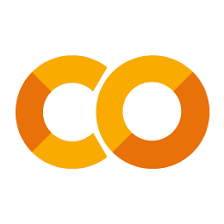

### **1.2. Ngrok**

Ngrok est un outil open-source qui permet de créer un tunnel sécurisé entre un serveur local et Internet. En utilisant Ngrok, vous pouvez exposer un port local de votre machine au monde extérieur, ce qui permet à des services en ligne tels que Google Colab d'y accéder. Cela est particulièrement utile pour accéder à des ressources telles que des bases de données ou des serveurs web locaux qui ne sont pas accessibles directement depuis Internet. Ngrok est facile à installer et à utiliser, et il est largement utilisé par les développeurs pour tester des applications en local avant de les déployer sur des serveurs en production.

Le lien pour télécharger ce dernier est: [Ngrok](https://dashboard.ngrok.com/get-started/setup)

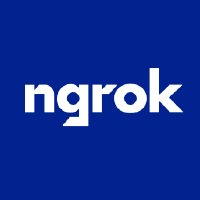

### **1.3. Mysql Workbench 8**

MySQL Workbench est une application graphique de gestion de bases de données relationnelles MySQL. Elle permet aux utilisateurs de créer, de visualiser et de modifier des bases de données MySQL, ainsi que de gérer les utilisateurs et les autorisations d'accès à ces bases de données. MySQL Workbench offre une interface conviviale pour la conception de schémas de base de données, la modélisation de données, la création de requêtes SQL, la gestion des sauvegardes et des restaurations, ainsi que l'optimisation de la performance de la base de données. Cette application est souvent utilisée par les développeurs et les administrateurs de bases de données pour gérer efficacement leurs bases de données MySQL localement.

Le lien pour télécharger ce dernier est: [MySQL Workbench](https://dev.mysql.com/downloads/workbench/)

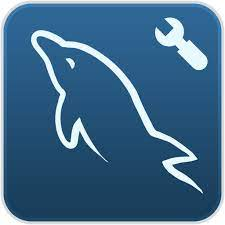

### **1.4. La bibliothèque "mysql-connector-python"**

mysql-connector-python est un pilote Python open-source qui permet de se connecter à une base de données MySQL à partir d'une application Python. Ce pilote fournit une interface Python pour accéder à la base de données, permettant aux développeurs de lire, d'écrire et de manipuler des données dans une base de données MySQL à partir d'un script Python. Le pilote est facile à installer et à utiliser, et il est compatible avec les versions de Python 2.7 et de Python 3.x. Il est souvent utilisé pour la création d'applications Web et de scripts Python qui nécessitent l'accès à des bases de données MySQL.

## **2. Préparation de l'environnement**

In [ ]:
!pip install mysql-connector-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **3. Ouverture d'une connection TCP par Ngrok**

### **3.1. Ouverture d'une session CMD en tant que Administrateur**

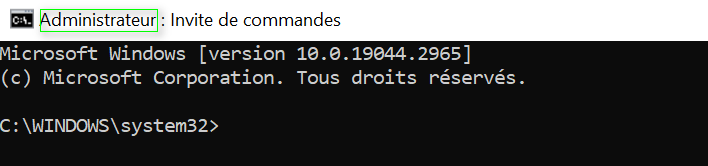

### **3.2. Navigation vers le répertoire ou il ya "Ngrok.exe"**

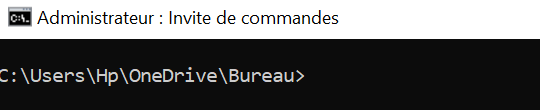

### **3.3. Exécution de la commande: ngrok tcp <N°port>**

Avant de pouvoir appliquer cette commande, il faut d'abord inscrit par un compte dans le site web du service ngrok, et puis de configurer la clé d'authentification

Dans mon cas, j'ai exécuter la commande de configuration:

**ngrok config add-authtoken 2PnOFbSywDPv4J6Wbj6B52ePi4C_82G28B9GSh6FJ8iogagRA**

(il se dépendre d'un compte à un autre)

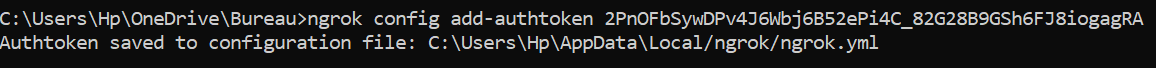

Dans mon cas, le port utilisé pour accéder à mon base de données via Mysql Workbench est 3306 (localhost:3306)
Donc, j'exécute la commande: **ngrok tcp 3306**

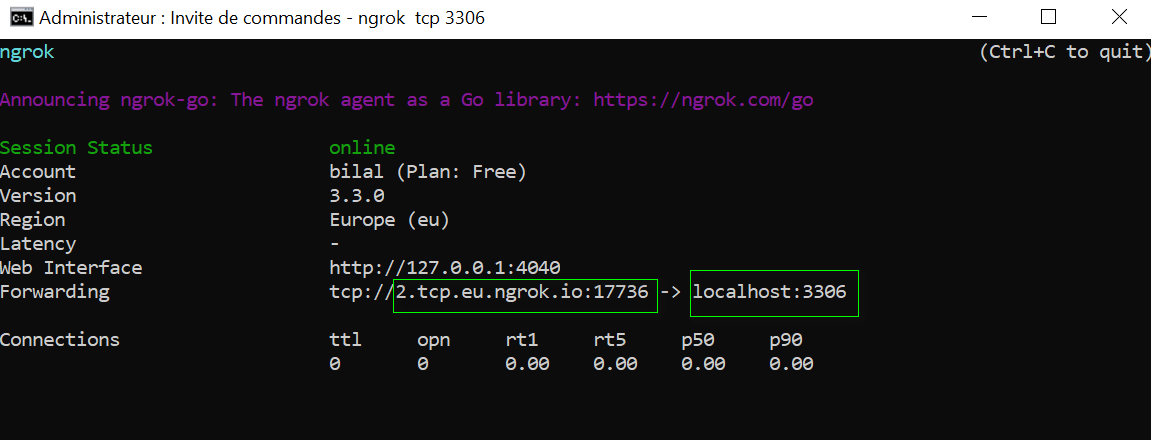

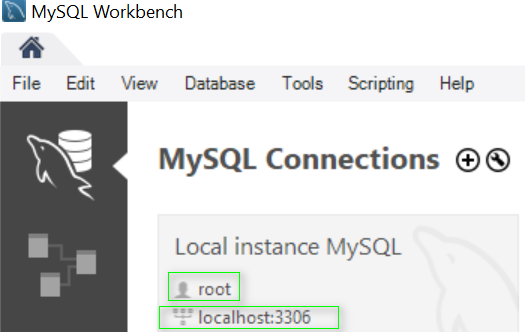

## **4. Accées au données**

### **4.1. Test 1: sur une table simple 'Customer'**

#### **4.1.1. Accées**

In [ ]:
import mysql.connector

# créer un objet de connexion
mydb = mysql.connector.connect(
    host="5.tcp.eu.ngrok.io",
    port=10153, # remplacer par le numéro de port affiché dans la sortie ngrok
    user="root",
    password="1234",
    database="mydb"
)

# créer un objet curseur
mycursor = mydb.cursor()

In [ ]:
# exécuter une instruction SELECT
mycursor.execute("SELECT * FROM customers")

# récupérer les résultats
myresult = mycursor.fetchall()

# afficher les résultats
for row in myresult:
    print(row)

(1, 'Company Inc', 'Highway 37')
(2, 'John', 'Highway 71')
(3, 'Peter', 'Lowstreet 4')
(4, 'Amy', 'Apple st 652')
(5, 'Hannah', 'Mountain 21')
(6, 'Michael', 'Valley 345')
(7, 'Sandy', 'Ocean blvd 2')
(8, 'Betty', 'Green Grass 1')
(9, 'Richard', 'Sky st 331')
(10, 'Susan', 'One way 98')
(11, 'Vicky', 'Yellow Garden 2')
(12, 'Ben', 'Park Lane 38')
(13, 'William', 'Central st 954')
(14, 'Chuck', 'Main Road 989')
(15, 'Viola', 'Sideway 1633')


#### **4.1.2. Avoir le nom des colones du résultat**

In [ ]:
# retrieve the column names
column_names = [desc[0] for desc in mycursor.description]

# print the column names
print(column_names)

['id', 'name', 'address']


#### **4.1.3. Affichage du résltat sous forme d'un tableau**

In [ ]:
import pandas as pd
# create a DataFrame from the results and column names
df = pd.DataFrame(myresult, columns=column_names)

# display the DataFrame as an HTML table
display(df)

,id,name,address
0,1,Company Inc,Highway 37
1,2,John,Highway 71
2,3,Peter,Lowstreet 4
3,4,Amy,Apple st 652
4,5,Hannah,Mountain 21
5,6,Michael,Valley 345
6,7,Sandy,Ocean blvd 2
7,8,Betty,Green Grass 1
8,9,Richard,Sky st 331
9,10,Susan,One way 98


#### **4.1.4. Insertion d'une ligne (sans avoir des errors)**

#### **4.1.5. Insertion d'une ligne (avec une errors)**

#### **4.1.6. Suppression d'une ligne de la table**

### **4.2. Test 2: sur une base de données grand et réelle (Analyses)**

#### 4.2.1. Accée

Le lien de téléchargement de la base de données est: [database](https://downloads.mysql.com/docs/world-db.zip)

In [ ]:
import mysql.connector

# créer un objet de connexion
mydb = mysql.connector.connect(
    host="7.tcp.eu.ngrok.io",
    port=14851, # remplacer par le numéro de port affiché dans la sortie ngrok
    user="root",
    password="1234",
    database="world"
)

#### 4.2.2. Avoir l'essencial des informations de la base de données

In [ ]:
import pandas as pd

# create a cursor object
mycursor = mydb.cursor()

# retrieve the table names
mycursor.execute("SHOW TABLES")
table_names = [table[0] for table in mycursor]

# retrieve the number of rows in each table
table_row_counts = {}
for table in table_names:
    mycursor.execute(f"SELECT COUNT(*) FROM {table}")
    row_count = mycursor.fetchone()[0]
    table_row_counts[table] = row_count

# retrieve the primary key columns for each table
table_primary_keys = {}
for table in table_names:
    mycursor.execute(f"SHOW KEYS FROM {table} WHERE Key_name = 'PRIMARY'")
    primary_key_columns = [key[4] for key in mycursor]
    table_primary_keys[table] = primary_key_columns

# Convert the information to a DataFrame
data = {
    'Table Names': table_names,
    'Row Counts': [row_count for _, row_count in table_row_counts.items()],
    'Primary Keys': [', '.join(primary_keys) for _, primary_keys in table_primary_keys.items()]
}
df2 = pd.DataFrame(data)

# Print the DataFrame
display(df2)

,Table Names,Row Counts,Primary Keys
0,city,4079,ID
1,country,239,Code
2,countrylanguage,984,"CountryCode, Language"


#### 4.2.3. Distribution moyenne de la population dans les continents du monde

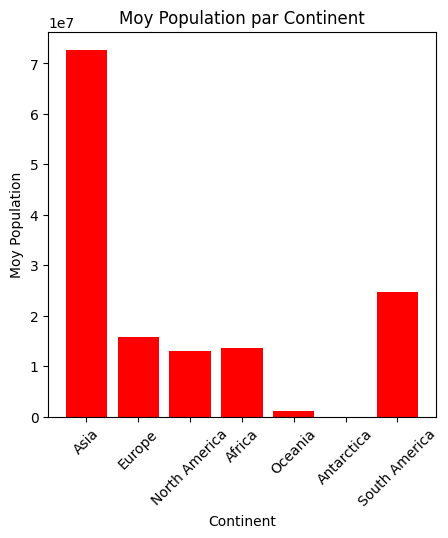

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mycursor.execute("SELECT Continent, AVG(Population) AS pop FROM country GROUP BY Continent;")
myresult = mycursor.fetchall()
column_names = [desc[0] for desc in mycursor.description]
df = pd.DataFrame(myresult, columns=column_names)

plt.figure(figsize=(5, 5))
plt.bar(df['Continent'], np.round(df['pop'].astype(float), 2), color='r')

plt.xlabel('Continent')
plt.ylabel('Moy Population')
plt.title('Moy Population par Continent')

plt.xticks(rotation=45)
plt.show()


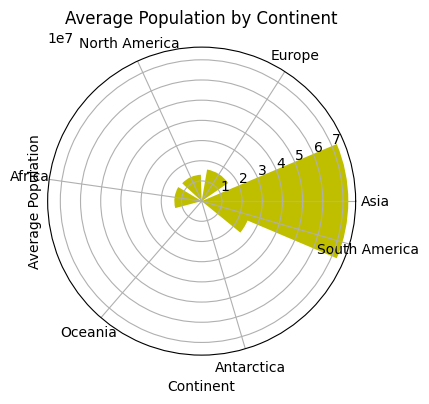

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mycursor.execute("SELECT Continent, AVG(Population) AS pop FROM country GROUP BY Continent;")
myresult = mycursor.fetchall()
column_names = [desc[0] for desc in mycursor.description]
df = pd.DataFrame(myresult, columns=column_names)

fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))
ax.bar(df['Continent'], df['pop'], color='y')

plt.xlabel('Continent')
plt.ylabel('Average Population')
plt.title('Average Population by Continent')

plt.xticks(rotation=45)
plt.show()
